# Difference in Officer Misconduct by Gender

Courtney Cheung, John Driscoll

## Summary of Findings

### Introduction
In this project, we investigated the question: Are allegations more severe in cases where the misconduct is against a woman than for a man? To do so, we looked at a dataset derived from New York City’s Civilian Complaint Review Board’s (CCRB’s) records containing information on 12,000 civilian complaints filed against New York City police officers. The data span from September 1985 to January 2020, and pertain to closed cases for every police officer still on the force as of late June 2020 who had at least one substantiated allegation against them. To answer the question, we focused on data including complainants' gender and allegations.


### Cleaning and EDA
We created a cleaned data frame indexed by the unique ID of the complaint, `complaint_id`. Missing values under ‘complainant_ethnicity’ and ‘complaintant_gender’ were represented by strings such as “Unknown”, “Refused”, and “Not described”, so we replaced those values with NaN values to make all missing values in the dataset represented by NaN.  We then used information from the columns `month_closed` and `year_closed` to create the datetime columns `time_received` and `time_closed`. 

Using univariate analysis on allegations, it looks like officers who have an allegation against them have been accused of multiple types of misconduct. Using bivariate analysis on proportions of misconduct categories and allegations, we found that abuse of authority is the most common category of misconduct, and physical force is the most common Allegation. Using univariate analysis on gender, in which we dropped duplicate complaints to avoid double counting, we found that about 20% of complainants are female, and 80% are male. Using Univariate Analysis on complaint resolution time, we found that the average complaint takes a little under a year to resolve. Using Bivariate analysis and aggregation on complaint time by gender, we found that it is likely that the time that complaints took to be resolved is roughly equal for females and males. Lastly, we investigated the distributions of allegations by gender to see if there are any major differences before answering our question. We found three similarities, but a difference in the proportion of complaints that the officer refused to provide their name. Furthermore, the highest differences in allegations for females and males are use of language and threat of arrest. Overall, our exploratory data analysis shows that females are treated less respectfully by officers than males.



### Assessment of Missingness
Out of the columns that have missing values, `contact_reason` is likely to be NMAR based on what we can infer about the data generation process. We conclude that collecting additional data on the time of day at which the incident occured, could lead to `contact_reason` being MAR, as it would become dependent on a column in the dataset.

We also determined whether  values in `complainant_gender` are MAR using permutation tests with 500 trials and a significance level of 0.05 (95% confidence level). With a p-value of 0.0, we found that `complainant_gender` is dependent on `allegations`. After testing against all other columns, we found taht `complainant_gender` is MAR, dependent on all of the columns.


### Permutation Test
To answer our question, we performed a permutation test using TVD with a significance level of 0.05. We used the null hypothesis that the distribution of allegation types for complainant women is approximately equal to the distribution of allegation types for complainant men, and the alternative hypothesis that the distribution of allegation types for complainant women is not equal to the distribution of allegation types for complainant men. From this, we obtained a p-value of 0.0, indicating that we can reject the null hypothesis, and infer that officers perform misconduct differently against males and females.

## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('max_columns', None)

In [3]:
unclean_complaints = pd.read_csv('allegations_202007271729.csv')
unclean_complaints.head(3)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


### Cleaning and EDA

**Cleaning**

Missing Data

In [4]:
#missingness in complaint_ethnicinity, complainant_gender, complainant_age
#columns in dataframe have index 2 less than csv file
unclean_complaints.iloc[[2897, 2916]]

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
2897,13676,Ted,Saintgerard,109 PCT,26747,40332,8,2018,5,2019,102 PCT,POM,POM,Police Officer,Police Officer,Black,M,39,Unknown,Not described,NaN,Discourtesy,Word,106.0,Report of other crime,Arrest - other violation/crime,Exonerated
2916,13738,Duane,Atkinson,110 DET,6483,12627,12,2006,1,2008,101 PCT,POM,DT3,Detective,Police Officer,Black,M,28,NaN,NaN,NaN,Abuse of Authority,Gun Drawn,101.0,Moving violation,Arrest - other violation/crime,Unsubstantiated


Missingness occurs as NaN, 'Refused', 'Unknown', and 'Not Described' in the dataset, all in different columns. The distributions of missingness from columns with missing values that aren't only NaN is as follows:

In [5]:
#seems like the most missing data is in complainant_ethnicity
display(unclean_complaints['complainant_ethnicity'].value_counts(dropna=False))
display(unclean_complaints['complainant_gender'].value_counts(dropna=False))

Black              17114
Hispanic            6424
NaN                 4464
White               2783
Unknown             1041
Other Race           677
Asian                532
Refused              259
American Indian       64
Name: complainant_ethnicity, dtype: int64

Male                     24058
Female                    5021
NaN                       4195
Not described               57
Transwoman (MTF)            20
Transman (FTM)               5
Gender non-conforming        2
Name: complainant_gender, dtype: int64

We turn all of the non-NaN missing values into NaN below

In [6]:
#cleaning missingness of ethnicity
complaints = unclean_complaints.copy()

complaints['complainant_ethnicity'] = complaints['complainant_ethnicity'].replace(['Unknown', 'Refused'], np.NaN)
#display(complaints['complainant_ethnicity'].value_counts(dropna=False))
#cleaning missingness of gender
complaints['complainant_gender'] = complaints['complainant_gender'].replace('Not described', np.NaN)
#display(complaints['complainant_gender'].value_counts(dropna=False))

**Combining Date Columns to Create pd.Timestamp**

We only have columns for month and year received and closed, so we have to use a filler value of 1 to create a pandas Timestamp in order to keep track of the dates of the allegations.

In [7]:
complaints.head(3)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [8]:
complaints['time_received'] = complaints.apply(axis=1, func=lambda x: pd.Timestamp(year=x['year_received'], month=x['month_received'], day=1))
complaints.drop(columns=['month_received', 'year_received'], inplace=True)
complaints['time_closed'] = complaints.apply(axis=1, func=lambda x: pd.Timestamp(year=x['year_closed'], month=x['month_closed'], day=1))
complaints.drop(columns=['month_closed', 'year_closed'], inplace=True)

**Exploratory Data Analysis**

To start thinking about answering this question:

"Are allegations more severe in cases where the misconduct is against a women than a man?"
    
we will not be dropping duplicate complaint id columns because each row for a single complaint contains a different allogation that we are going to look at. However, for looking at individual complaintants, we do have to drop duplicate columns so that we don't count individuals more than once.

Aggregate: Duplicate Allegations

In [9]:
display(
    "There are " + str(complaints.shape[0]) + " total allegations against officers.",
    "However, there are only " + str(len(complaints['complaint_id'].unique())) + " total complaints filed.",
    "This means that there is a large amount of complaints with multiple allegations"
)

display("This is what a few rows with multiple allegations look like:")
display(complaints.set_index('complaint_id').loc[
    complaints[complaints.duplicated(subset='complaint_id')]['complaint_id']
][
    ['first_name','last_name', 'complainant_ethnicity','complainant_gender','fado_type','allegation','outcome_description','board_disposition']
].head(4))
display("Duplicate complaint id's have all of the same information except for different complaint types and allegations")

'There are 33358 total allegations against officers.'

'However, there are only 12056 total complaints filed.'

'This means that there is a large amount of complaints with multiple allegations'

'This is what a few rows with multiple allegations look like:'

,first_name,last_name,complainant_ethnicity,complainant_gender,fado_type,allegation,outcome_description,board_disposition
complaint_id,,,,,,,,
24601,John,Sears,Black,Male,Discourtesy,Action,Moving violation summons issued,Substantiated (Charges)
24601,John,Sears,Black,Male,Offensive Language,Race,Moving violation summons issued,Substantiated (Charges)
41927,Fazle,Tanim,Asian,Male,Abuse of Authority,Refusal to provide shield number,Moving violation summons issued,Unsubstantiated
41927,Fazle,Tanim,Asian,Male,Abuse of Authority,Retaliatory summons,Moving violation summons issued,Substantiated (Command Discipline A)


"Duplicate complaint id's have all of the same information except for different complaint types and allegations"

Univariate Analysis: Allegations

In [10]:
duplicate_complaints = complaints.set_index('complaint_id').loc[
    complaints[complaints.duplicated(subset='complaint_id')]['complaint_id']
]
display('The number of cases with more than one allegation is: ', 
    duplicate_complaints.shape[0])
display('The average number of allegations for a case is: ', 
    (duplicate_complaints.reset_index().groupby('complaint_id')['unique_mos_id'].count().sum()
     + 12056)/complaints.shape[0])

'The number of cases with more than one allegation is: '

120872

'The average number of allegations for a case is: '

3.9848911805264104

On average, it seems like officers who have an allogation against them have been accused of multiple types of misconduct. This is a lot of information to process, so we need to look at how the different types of misconduct are broken up.

Bivariate Analysis: Proportions of Misconduct Categories and Allegations

'There are 4 different categories of misconduct with the following proportions:'

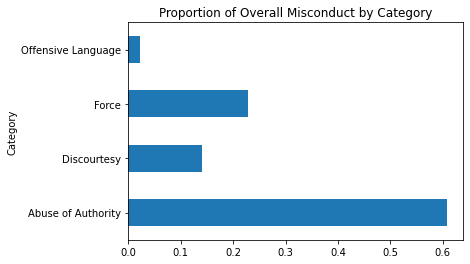

'There are 115 different possible allegations, the most common of which are displayed below:'

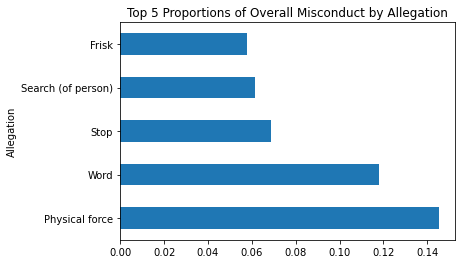

In [11]:
#finds the proportions of misconducts
display("There are 4 different categories of misconduct with the following proportions:")
category_props = complaints.groupby('fado_type')['complaint_id'].count() / complaints.shape[0]
category_props.plot(
    kind='barh', title='Proportion of Overall Misconduct by Category', xlabel='Category'
    )
plt.show()

#finds the proportions of allegations
allegation_props = complaints.groupby('allegation')['complaint_id'].count() / complaints.shape[0]
display("There are " + str(allegation_props.shape[0]) + " different possible allegations, the most common of which are displayed below:")
allegation_props.sort_values(ascending=False).head(5).plot(
    kind='barh', title='Top 5 Proportions of Overall Misconduct by Allegation', xlabel='Allegation'
    )
plt.show()
#complaints.groupby(['fado_type', 'allegation'])[['complaint_id']].count().reset_index()

Abuse of Authority is the most common category of misconduct, and Physical Force is the most common Allegation, making up ~15% of all allegations, which is a scarily large proportion.

Univariate Analysis: Gender

Since our question being asked is in regards to gender, we need to know the distribution of the genders of the individuals filing complaints. For this question, we have to drop duplicate complaints so that we don't count individuals multiple times

Gender non-conforming       1
Transman (FTM)              2
Transwoman (MTF)            5
Female                   2073
Male                     8157
Name: complainant_gender, dtype: int64

Gender non-conforming    0.000098
Transman (FTM)           0.000195
Transwoman (MTF)         0.000488
Female                   0.202481
Male                     0.796738
Name: complainant_gender, dtype: float64

<AxesSubplot:title={'center':'Proportions of Gender'}, ylabel='Gender'>

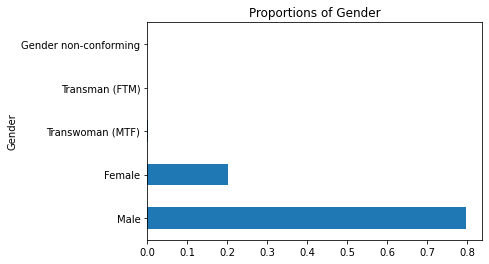

In [12]:
unique_complaints = complaints.drop_duplicates(subset='complaint_id')
display(unique_complaints['complainant_gender'].value_counts().sort_values(ascending=True))
gender_props = unique_complaints['complainant_gender'].value_counts(normalize=True)
display(gender_props.sort_values(ascending=True))
gender_props.plot(
    kind='barh', title='Proportions of Gender', xlabel='Gender'
)

About 20% of the complainants are Female and 80% are Male. This distribution is uneven, but both populations have large enough sample sizes that we will be able to answer our question with accuracy.

Univariate Analysis: Complaint Resolution Time

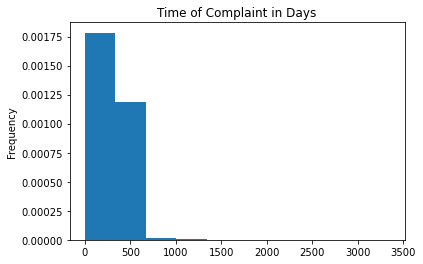

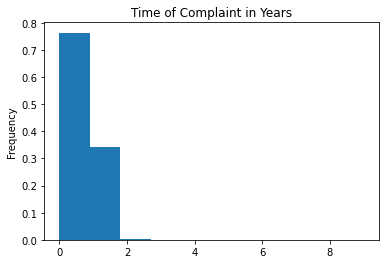

'The average number of days that a Complaint took to resolve was 296.2687211463517'

In [13]:
time_complaint = (complaints['time_closed'] - complaints['time_received'])
time_complaint.dt.days.plot(
    kind='hist', density=True, title='Time of Complaint in Days', xlabel='Time in days'
)
plt.show()
(time_complaint.dt.days // 365.25).plot(
    kind='hist', density=True, title='Time of Complaint in Years', xlabel='Time in years'
)
plt.show()
display("The average number of days that a Complaint took to resolve was " + str(time_complaint.dt.days.mean()))

Around 75% of complaints are resolved in under a year, while about 35% take between 1 and two years. The average complaint takes a little bit under a year to resolve which doesn't seem like a timely response for something as serious as officer misconduct.

Bivariate Analysis and Aggregation: Complaint Time by Gender

/var/folders/hw/nwdk4wnd1rl7g6j4v1p5q_t00000gn/T/ipykernel_70173/511900387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_complaints['time_complaint'] = time_complaint


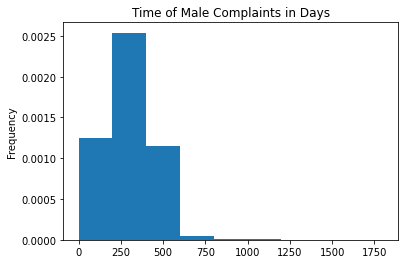

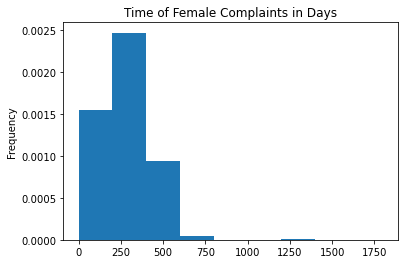

In [14]:
unique_complaints['time_complaint'] = time_complaint
time_complaint_genders = unique_complaints.groupby('complainant_gender')['time_complaint']
time_complaint_genders.get_group('Male').dt.days.plot(
    kind='hist', density=True, title='Time of Male Complaints in Days', xlabel='Time in days', bins=range(0, 2000, 200)
)
plt.show()
time_complaint_genders.get_group('Female').dt.days.plot(
    kind='hist', density=True, title='Time of Female Complaints in Days', xlabel='Time in days', bins=range(0, 2000, 200)
)
plt.show()

These distributions look roughly the same

In [15]:
display("The mean complaint resolution time for Males in days is:")
display(time_complaint_genders.get_group('Male').dt.days.mean())
display("The mean complaint resolution time for Females in days is:")
display(time_complaint_genders.get_group('Female').dt.days.mean())

'The mean complaint resolution time for Males in days is:'

310.7209758489641

'The mean complaint resolution time for Females in days is:'

287.5740472744814

While male complaints seem to take slightly longer to be resolved, there are some male complaint outliers that went unresolved for a long period of time, so it is likely that the time that complaints took to be resolved is roughly equal for Females and Males.

Aggregation: Distribution of Allegations by Gender

After looking at the distribution Allegations by themselves, we now need to look at their distributions by gender to see if there are any major differences before performing a permutation test to answer our question.

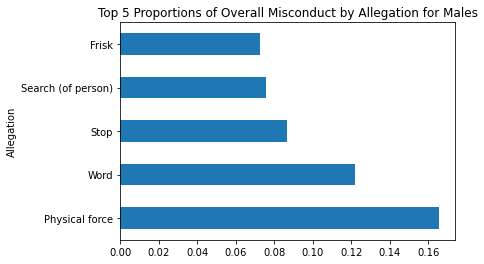

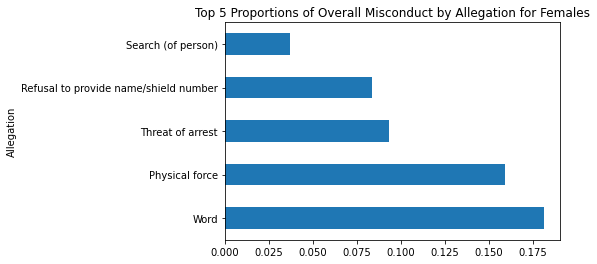

In [16]:
male_allegations = complaints[complaints['complainant_gender'] == 'Male']
male_props = male_allegations.groupby('allegation')['complaint_id'].count() / male_allegations.shape[0]
male_props.sort_values(ascending=False).head(5).plot(
    kind='barh', title='Top 5 Proportions of Overall Misconduct by Allegation for Males', xlabel='Allegation'
    )
plt.show()

female_allegations = complaints[complaints['complainant_gender'] == 'Female']
female_props = female_allegations.groupby('allegation')['complaint_id'].count() / female_allegations.shape[0]
female_props.sort_values(ascending=False).head(5).plot(
    kind='barh', title='Top 5 Proportions of Overall Misconduct by Allegation for Females', xlabel='Allegation'
    )
plt.show()

Word, Physical force, and Search of person appeared in high proportions for both Males and Females. Something that stands out is that a high proportioned female complaint is that the officer refused to provide their name, but not for males.

Let's now look at what types of allegations differ the greatest for Males and Females to see what factors may influence our permutation test the most.

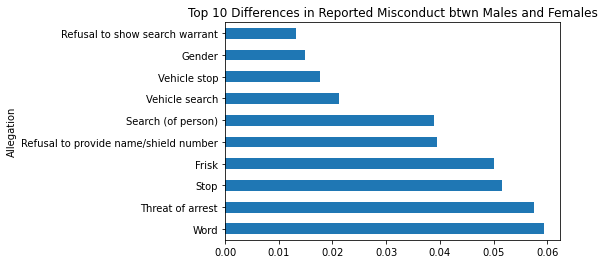

allegation
Word                                    -0.059367
Threat of arrest                        -0.057536
Stop                                     0.051530
Frisk                                    0.049995
Refusal to provide name/shield number   -0.039523
Search (of person)                       0.038888
Vehicle search                           0.021153
Vehicle stop                             0.017739
Gender                                  -0.014927
Refusal to show search warrant          -0.013183
Name: complaint_id, dtype: float64

In [17]:
difference_props = male_props - female_props
top_10 = abs(male_props - female_props).sort_values(ascending=False).head(10)
top_10.plot(
    kind='barh', title='Top 10 Differences in Reported Misconduct btwn Males and Females', xlabel='Allegation'
)
plt.show()
difference_props.loc[top_10.index]

The highest differences in allegations for Females and Males are use of language and threat of arrest. Both of which Females reported 5% more than their Male counterparts. Coupled with the fact that Females also reported complaints based on treatement of their gender and officers refusing to provide them with information, it seems like Females are treated less respectfully by officers than their Male counterparts.

### Assessment of Missingness

The more columns in a dataset, less likely it will be that a column will be NMAR. To assess which columns are NMAR, if any, we need to find the columns that have missing values. To determine this, we will consider the data generation process for each column in the list `contact_reason`.

In [18]:
#printing the number of NaN's per column if there are any
for col in complaints.columns:
    num_missing = complaints[col].isna().sum()
    if num_missing:
        print(col, num_missing)

command_at_incident 1544
complainant_ethnicity 5764
complainant_gender 4252
complainant_age_incident 4812
allegation 1
precinct 24
contact_reason 199
outcome_description 56


Our dataset contains 29 columns, so it is unlikely that a given column is NMAR. As such, out of the columns that contain missing values, only `contact_reason` could be NMAR based on what we can infer about the data generation process. One way that contact_reason could be NMAR is if the complainants did not provide a response because they were unsure of why the officer made contact with them. This would mean that the missingness was dependent on the value itself. If we were to collect more data, for example, the time of day that the incident occurred, we might see a relationship between the chance of missingness and whether the incident occurred between 11pm and 2am, since people may not be fully able to process or make sense of the incident at that time due to tiredness. This addition to the dataset would make `contact_reason` MAR instead of NMAR, because the chance of its missingness would be dependent on values in another column. 

To perform the following missigness tests, we create a tvd helper function to calculate TVD.

In [19]:
def tvd_of_groups(df, idx, cols):
    #pivot table of counts
    cnts = df.pivot_table(index=idx, columns=cols, aggfunc='size')
    #tvd calculation
    distr = cnts / cnts.sum()
    #display(distr)
    #display(distr.diff(axis=1).iloc[:, -1])
    return distr.diff(axis=1).iloc[:, -1].abs().sum() / 2

To calculate observed TVD's we will need a dataframe with an added column of with boolean values indicating 
whether the complainant gender is missing.

In [20]:
missing = (complaints.assign(complainant_gender_missing=complaints['complainant_gender'].isna()))

<AxesSubplot:title={'center':'allegation by Missingness of Complaintant Gender'}, ylabel='allegation'>

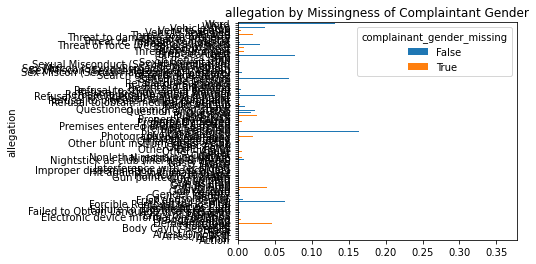

In [21]:
#calculating observed TVD
obs_tvd = tvd_of_groups(missing, 'allegation', 'complainant_gender_missing')
obs_tvd

#visualize the observation
cnts = missing.pivot_table(index='allegation', columns='complainant_gender_missing', aggfunc='size')
distr = cnts / cnts.sum()
display(distr.plot(kind='barh', figsize=(5, 4), title='allegation by Missingness of Complaintant Gender'))

Then we execute 500 permutations of the allegation column and calculated each TVD.

In [22]:
#setup
shuffled = complaints.copy()
shuffled['complainant_gender_missing'] = shuffled['complainant_gender'].isna()

n_repetitions = 500
tvds = []
for _ in range(n_repetitions):
    
    # Shuffling board dispositions and assigning back to the DataFrame
    shuffled['allegation'] = np.random.permutation(shuffled['allegation'])
    
    # Computing and storing TVD
    tvd = tvd_of_groups(shuffled, 'allegation', 'complainant_gender_missing')
    tvds.append(tvd)


Here we calculate the p-value, and visualize the observation relative to the null distribution.
This indicates that we can reject the null hypothesis to say that `complainant_gender` is MAR dependent on `allegation`.

0.0


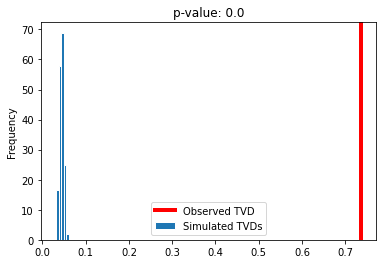

In [23]:
#calculating the p-value
pval = np.mean(tvds >= obs_tvd)
print(pval)

#plotting the observation and the distribution
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=5, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

The following work assesses whether the missingness of `complainant_gender` is dependent on `board_disposition`. This is a done with a permutation test under the null hypothesis that the distribution of `board_disposition` when `complainant_gender` is missing is the same as the distribution of `board_disposition` when `complainant_gender` is not missing.

First we calculate the observed TVD and visualize the allegations categories by missignness of complaintant gender.

0.13974102283805284


<AxesSubplot:title={'center':'Board Dispositions by Missingness of Complaintant Gender'}, ylabel='board_disposition'>

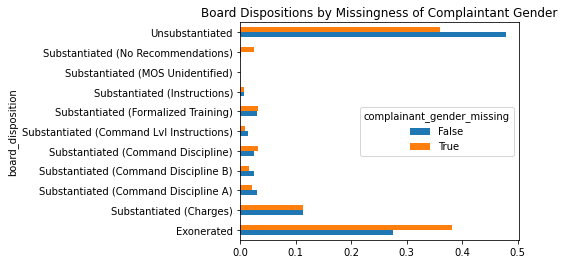

In [24]:
#calculating tvd using helper function
obs_tvd = tvd_of_groups(missing, 'board_disposition', 'complainant_gender_missing')
print(obs_tvd)

#visualize the observation
cnts = missing.pivot_table(index='board_disposition', columns='complainant_gender_missing', aggfunc='size')
distr = cnts / cnts.sum()
display(distr.plot(kind='barh', figsize=(5, 4), title='Board Dispositions by Missingness of Complaintant Gender'))

Then we execute 500 permutations of the board disposition column and calculated each TVD.

In [25]:
#setup
shuffled = complaints.copy()
shuffled['complainant_gender_missing'] = shuffled['complainant_gender'].isna()

n_repetitions = 500
tvds = []
for _ in range(n_repetitions):
    
    # Shuffling board dispositions and assigning back to the DataFrame
    shuffled['board_disposition'] = np.random.permutation(shuffled['board_disposition'])
    
    # Computing and storing TVD
    tvd = tvd_of_groups(shuffled, 'board_disposition', 'complainant_gender_missing')
    tvds.append(tvd)

Here we calculate the p-value, and visualize the observation relative to the null distribution.
This indicates that we can reject the null hypothesis to say that `complainant_gender` is MAR dependent on `board_disposition`.

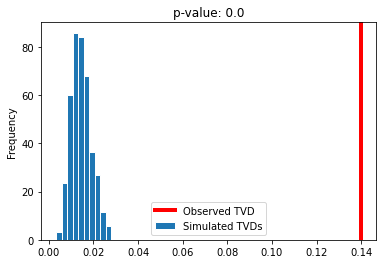

In [26]:
#calculating p-vlaue
pval = np.mean(tvds >= obs_tvd)

#plotting the observation against the distribution
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

The following work assesses whether the missingness of `complainant_gender` is dependent on `board_disposition`. This is a done with a permutation test under the null hypothesis that the distribution of `board_disposition` when `complainant_gender` is missing is the same as the distribution of `board_disposition` when `complainant_gender` is not missing.

First we calculate the observed TVD and visualize the allegations categories by missignness of complaintant gender.

0.21351835012633294


<AxesSubplot:title={'center':'First Name by Missingness of Complaintant Gender'}, ylabel='first_name'>

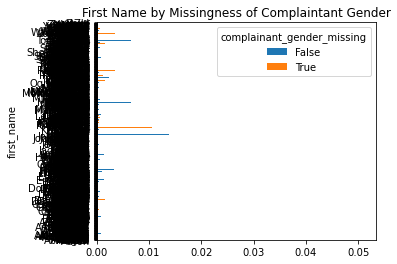

In [27]:
#calculating tvd using helper function
obs_tvd = tvd_of_groups(missing, 'first_name', 'complainant_gender_missing')
print(obs_tvd)

#visualize the observation
cnts = missing.pivot_table(index='first_name', columns='complainant_gender_missing', aggfunc='size')
distr = cnts / cnts.sum()
display(distr.plot(kind='barh', figsize=(5, 4), title='First Name by Missingness of Complaintant Gender'))

Then we execute 500 permutations of the rank now column and calculated each TVD.

In [28]:
#setup
shuffled = complaints.copy()
shuffled['complainant_gender_missing'] = shuffled['complainant_gender'].isna()

n_repetitions = 10
tvds = []
for _ in range(n_repetitions):
    
    # Shuffling board dispositions and assigning back to the DataFrame
    shuffled['year_received'] = np.random.permutation(shuffled['first_name'])
    
    # Computing and storing TVD
    tvd = tvd_of_groups(shuffled, 'year_received', 'complainant_gender_missing')
    tvds.append(tvd)

Here we calculate the p-value, and visualize the observation relative to the null distribution.
This indicates that we can reject the null hypothesis to say that `complainant_gender` is dependent on `first_name`.

In [29]:
#calculating p-vlaue
pval = np.mean(tvds >= obs_tvd)
print(pval)
#plotting the observation against the distribution
# pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
# plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
# plt.legend();

0.0


Performing permutation tests on all of the columns result in p-values of 0. This indicates that complainant_gender is dependent on all of the columns.

### Permutation Test

**Are allegations against officers approximately the same for women and men?**

Null hypothesis: The distribution of allegation types for complaintant women is approxmately equal to the distribution of allegation types for complainant men.

Alternative hypothesis: The distribution of allegation types for complaintant women is not equal to the distribuiton of allegation types for complainant men.

We'll complete this permutation test for allegation distributions using the Total Variation Distance (TVD) statistic, because we are comparing two categorial distributions of allegations for women and men.

Our significance level is 0.05, so that we can be 95% confident that the observed difference is not due to random chance. 

Function for calculating the TVD statistic from all complaints:

In [30]:
def tvd(complaints):
    #get the proportions of all allegations by Female complainants
    female_allegations = complaints[complaints['complainant_gender'] == 'Female']
    female_props = female_allegations.groupby('allegation')['complaint_id'].count() / female_allegations.shape[0]

    #get the proportions of all allegations by Male complainants
    male_allegations = complaints[complaints['complainant_gender'] == 'Male']
    male_props = male_allegations.groupby('allegation')['complaint_id'].count() / male_allegations.shape[0]

    return np.sum(np.abs(female_props - male_props))/2

Observed Statistic:

In [31]:
display('Our observed Total Variation Distance between the distributions of Male and Female allegations is:')
obs_tvd = tvd(complaints)
obs_tvd

'Our observed Total Variation Distance between the distributions of Male and Female allegations is:'

0.26237207502700977

Performing the Permutation Test:

In [32]:
N = 500
null_tvds = []
for _ in range(N):
    complaints_shuffled = complaints.copy()
    complaints_shuffled['allegation'] = complaints_shuffled['allegation'].sample(frac=1, replace=False).reset_index(drop=True)
    null_tvd = tvd(complaints_shuffled)
    null_tvds.append(null_tvd)
display('The first 5 permuted TVD\'s are:')
null_tvds[:5]

"The first 5 permuted TVD's are:"

[0.04708527451806909,
 0.031812054016906524,
 0.045074474719686335,
 0.04759268698865215,
 0.046131793064854605]

Calculating the p-value:

In [33]:
display('Our p-value is:')
pval = np.mean(obs_tvd <= np.array(null_tvds))
pval

'Our p-value is:'

0.0

Conclusion:

Since our p-value is less than our significance level of 0.05, we have convincing evidence that the distribution of allogation types for complaintant women is not equal to the distribuiton of allegation types for complaintant men, and therefore **we reject the null hypothesis**.

With this information, we can infer that the difference between reported allegations that we see in this dataset is not due to random chance, and that officers perform misconduct differently against Males and Females.